In [1]:
import numpy as np
import pandas as pd


In [2]:
#ASSIGNMENT BASIC LINE CHARTS
oils = pd.read_csv('../oil.csv', parse_dates=['date'])

oils

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


<Axes: xlabel='date'>

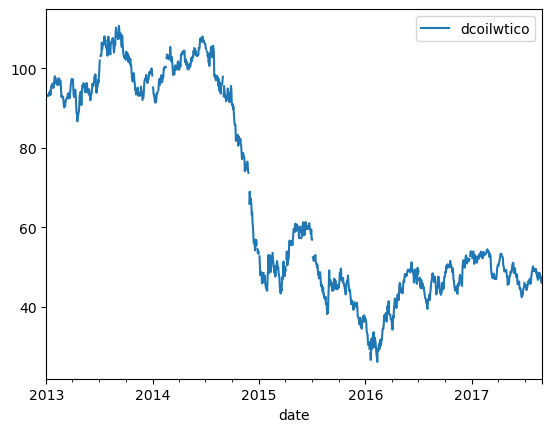

In [3]:
#create a line chart 
oils.plot(x='date', y='dcoilwtico')

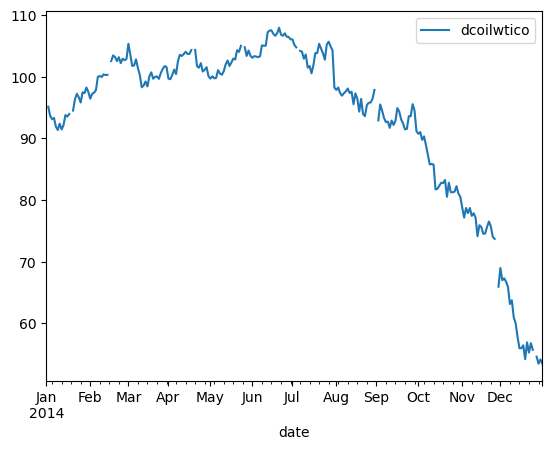

In [4]:
#graph in 2014
#add semicolon to delete te <> logo
oils.set_index('date').loc['2014'].plot();

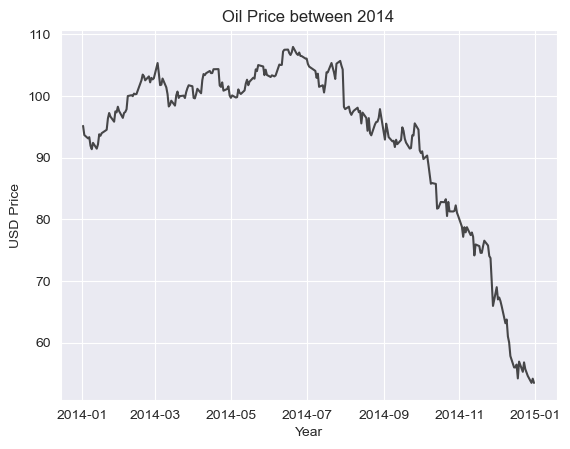

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the index to 'date' and filter data for the year 2014
oils_2014 = oils.set_index('date').loc['2014']

# Rename the 'dcoilwtico' column to 'Oil Price'
oils_2014 = oils_2014.rename(columns={'dcoilwtico': 'Oil Price'})

# Create a line plot using Seaborn
sns.set_style('darkgrid')
sns.lineplot(data=oils_2014, x=oils_2014.index, y='Oil Price', color='black', alpha=0.7)

# Customize the plot with title, labels, etc.
plt.title('Oil Price between 2014')
plt.xlabel('Date')
plt.ylabel('USD Price')

# Display the plot
plt.show()






In [15]:
#ASSIGNMENT STYLIZED LINE CHART

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

oils_2014

,Oil Price
date,
2014-01-01,NaN
2014-01-02,95.14
2014-01-03,93.66
2014-01-06,93.12
2014-01-07,93.31
...,...
2014-12-25,NaN
2014-12-26,54.59
2014-12-29,53.46


<Axes: title={'center': 'Oil Price 2014'}, xlabel='Year', ylabel='USD Price'>

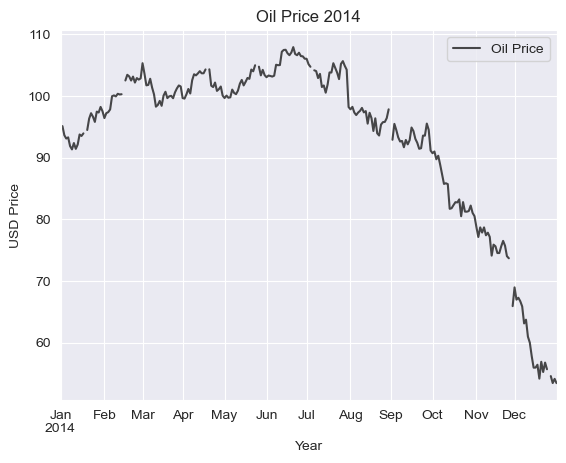

In [17]:
#using plot() method and not plt method
oils_2014.rename(columns={'dcoilwtico':'Oil Price'}).plot(
     #x='Year', 
     y='Oil Price',
     title='Oil Price 2014',
     xlabel='Year',
     ylabel='USD Price',
     color='black',
    alpha=.7
)


In [29]:
#ASSIGNMENT SUBPLOT
#using transactions dataframe, first create a table where the index is date and the store only contains store number 1, 2, 3, and 4 

trans = pd.read_csv('transactions.csv', parse_dates=['date']).set_index('date')

trans



,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922
...,...,...
2017-08-15,50,2804
2017-08-15,51,1573
2017-08-15,52,2255


In [62]:
#practice using isin method
#return boolean value, so if we want to filter, use the loc method
trans['store_nbr'].isin([25])


date
2013-01-01     True
2013-01-02    False
2013-01-02    False
2013-01-02    False
2013-01-02    False
              ...  
2017-08-15    False
2017-08-15    False
2017-08-15    False
2017-08-15    False
2017-08-15    False
Name: store_nbr, Length: 83488, dtype: bool

In [65]:
#now to return the filtered value of the boolean, use the loc method
trans25 = trans.loc[trans['store_nbr'].isin([25])]
trans25

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,25,1038
2013-01-03,25,887
2013-01-04,25,1054
2013-01-05,25,1355
...,...,...
2017-08-11,25,2195
2017-08-12,25,1946
2017-08-13,25,1107


In [41]:
# to create the table based on the assignment, use pivot table
#use query method
trans_1234 = trans.query(" store_nbr in [1, 2, 3, 4] ").pivot_table(
    index='date',
    columns='store_nbr',
    values='transactions',
    aggfunc='sum'
)

trans_1234


store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


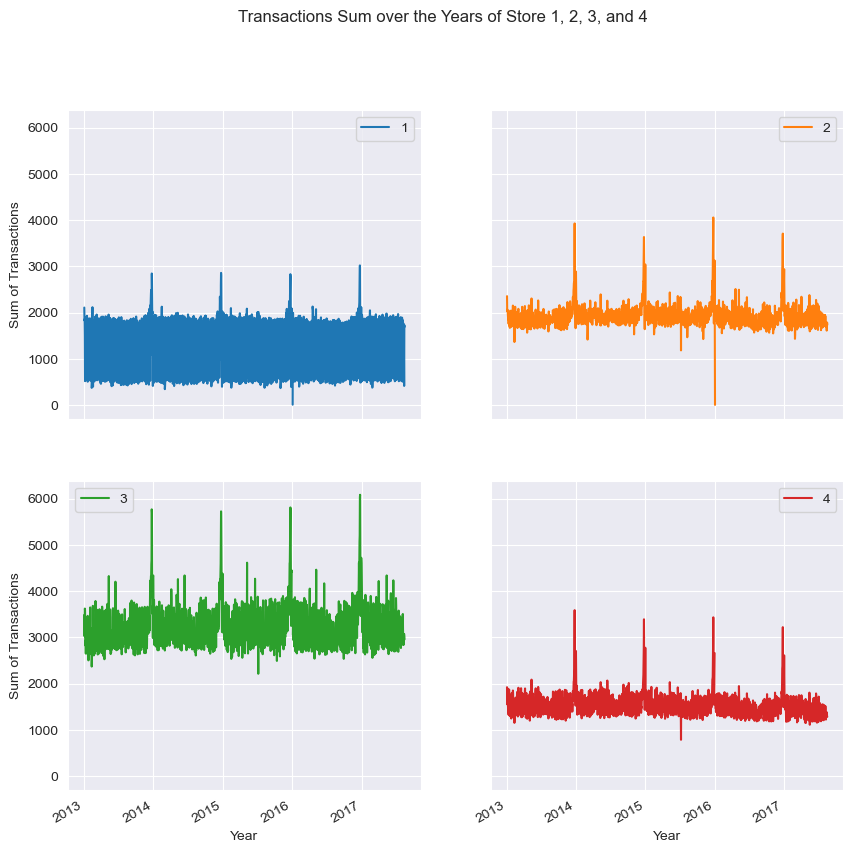

In [57]:
#after that create subplot
trans_1234.plot(
    title= "Transactions Sum over the Years of Store 1, 2, 3, and 4",
    xlabel='Year',
    ylabel='Sum of Transactions',
    subplots=True,
    layout=(2,2),
    sharey=True,
    figsize=(10,10)
);

In [89]:
#ASSIGNMENT BAR CHART
#first create the new table based on month

trans_1234_monthly = trans_1234.groupby(trans_1234.index.month).sum()

trans_1234_monthly


store_nbr,1,2,3,4
date,,,,
1,229203.0,284134.0,463260.0,222075.0
2,209400.0,265922.0,437238.0,209211.0
3,232178.0,293076.0,487224.0,231837.0
4,229081.0,287325.0,478308.0,223928.0
5,231160.0,293588.0,491961.0,228753.0
6,231514.0,284835.0,474668.0,222678.0
7,236032.0,288783.0,484698.0,224327.0
8,202821.0,255475.0,431752.0,200100.0
9,182035.0,228658.0,379101.0,178172.0


<Axes: xlabel='store_nbr'>

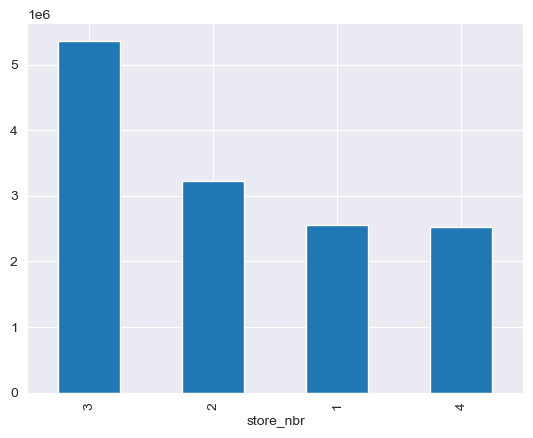

In [100]:
#create a summary table
trans_1234_monthly.sum().sort_values(ascending=False).plot.bar()

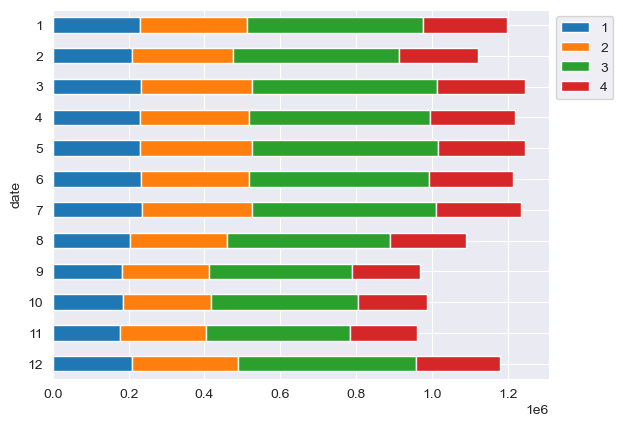

In [113]:
#create horizontal stacked bar chart based x=sum transaction, y=month 
trans_1234_monthly.sort_index(ascending=False).plot.barh(
    stacked=True,
    fontsize=10).legend(
        bbox_to_anchor=(1,1)
)

In [125]:
#ASSIGNMENT SCATTERPLOTS
trans_1234

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


<Axes: xlabel='3', ylabel='2'>

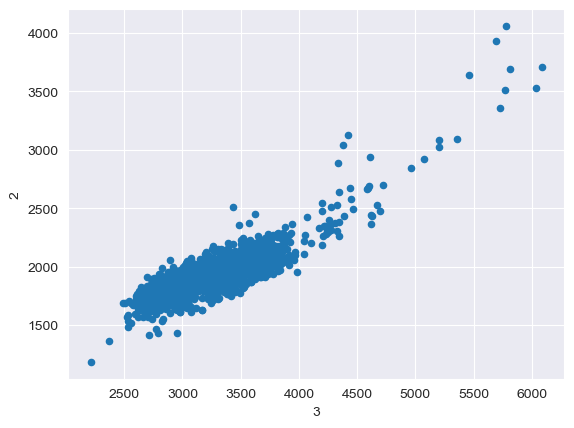

In [124]:
#create scatterplots based on date, do not sum the month
trans_1234.plot.scatter(x=3, y=2)


<Axes: xlabel='3', ylabel='2'>

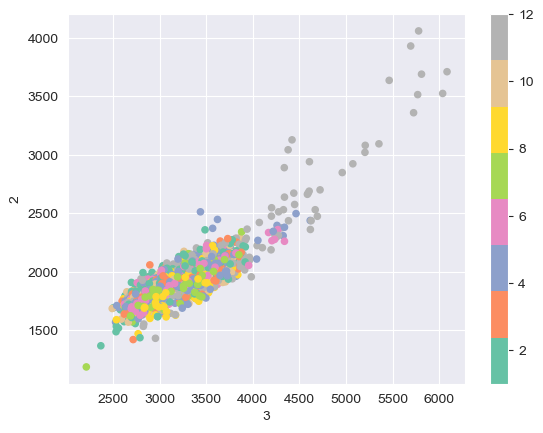

In [129]:
#set the color by month to check the relationship
trans_1234.plot.scatter(x=3, 
                        y=2,
                        c=trans_1234.index.month,
                        colormap='Set2'
                       )


In [132]:
#ASSIGNMENT HISTOGRAM
#plot distribution of store 2 and 3
trans_1234

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


<Axes: ylabel='Frequency'>

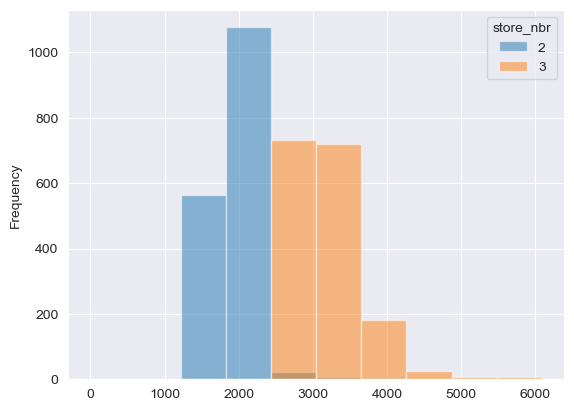

In [155]:
#create the histogram, the frequency of the number of transaction per day happened
trans_1234[[2,3]].plot.hist(alpha=.5)

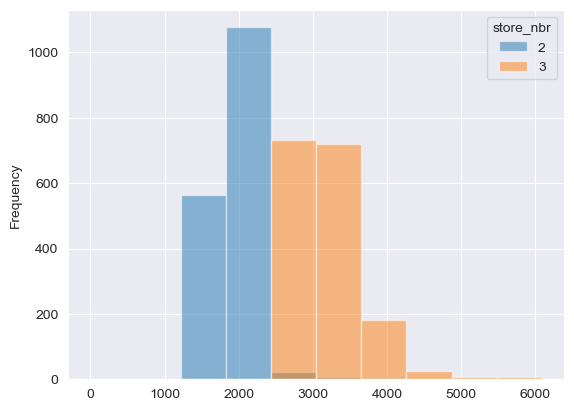

In [159]:
#saving plots
plot2 = trans_1234[[2,3]].plot.hist(alpha=.5)
plot2.figure.savefig('test.png', bbox_inches='tight')

In [ ]:
#THE END------------------------------------------------------------------------------------------------------------------------